Selected file(s): ['C:/Users/omark/Desktop/IDS with GUI/Dataset Properties.csv']


C:\Users\omark\AppData\Local\Temp\ipykernel_24476\1504884180.py:153: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(attack_data['Attack'], rotation=45, ha='right')
C:\Users\omark\AppData\Local\Temp\ipykernel_24476\1504884180.py:171: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(attack_data['Attack'], rotation=45, ha='right')


SystemExit: 0

C:\Users\omark\anaconda3\envs\test2\Lib\site-packages\IPython\core\interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


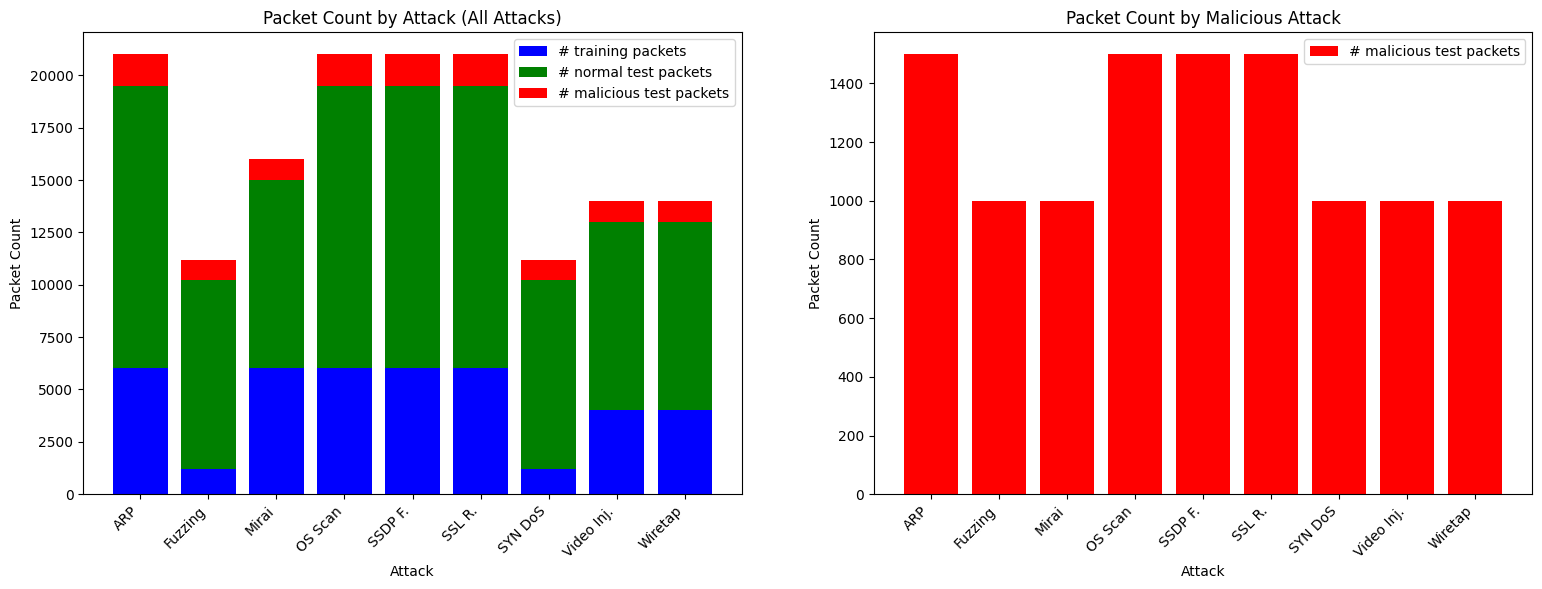

In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_qt5agg import FigureCanvasQTAgg as FigureCanvas
from PyQt5.QtWidgets import QApplication, QWidget, QPushButton, QVBoxLayout, QFileDialog, QMessageBox, QTextEdit, QLabel, QTableWidget, QTableWidgetItem, QHBoxLayout, QGroupBox
from PyQt5.QtGui import QIcon
from PyQt5.QtCore import Qt

class DataAnalysisGUI(QWidget):
    def __init__(self):
        super().__init__()

        self.init_ui()

    def init_ui(self):
        # Set window title
        self.setWindowTitle("System Eye")

        # Set application icon
        self.setWindowIcon(QIcon('IDS/WhatsApp Image 2024-05-07 at 21.00.22_37f3adb5.jpg'))

        # Set background color to white and text color to blue
        self.setStyleSheet("background-color: rgb(0, 153, 153); color: rgb(255, 255, 255);")

        # Add watermark
        watermark_label = QLabel(self)
        watermark_label.setGeometry(20, 20, 200, 50)
        watermark_label.setStyleSheet("font-size: 20px; color: rgba(255, 255, 255); border: 2px solid :#f44336 ; padding: 5px;")
        watermark_label.setText(" (IDS) Intrusion Detection System")

        # Upload button
        self.upload_button = QPushButton("Upload Dataset(s)", self)
        self.upload_button.setStyleSheet("background-color: #f44336; color: white;")  # Red color
        self.upload_button.clicked.connect(self.upload_datasets)

        # Analyze button
        self.analyze_button = QPushButton("Analyze", self)
        self.analyze_button.setStyleSheet("background-color: #f44336; color: white;")  # Red color
        self.analyze_button.clicked.connect(self.analyze_data)
        self.analyze_button.setEnabled(False)  # Disable analyze button initially

        # Results text edit
        self.results_textedit = QTextEdit(self)
        self.results_textedit.setReadOnly(True)
        self.results_textedit.setStyleSheet("background-color: rgb(255, 255, 255); color: rgb(0, 0, 0);")  # White background, black text

        # Table widget for displaying results
        self.results_table = QTableWidget(self)
        self.results_table.setColumnCount(4)
        self.results_table.setHorizontalHeaderLabels(['Attack', '# training packets', '# normal test packets', '# malicious test packets'])
        self.results_table.setStyleSheet("background-color: rgb(255, 255, 255); color: rgb(0, 0, 0);")  # White background, black text

        # Group box for text results
        text_results_groupbox = QGroupBox("Text Results", self)
        text_results_layout = QVBoxLayout()
        text_results_layout.addWidget(self.results_textedit)
        text_results_groupbox.setLayout(text_results_layout)

        # Group box for table results
        table_results_groupbox = QGroupBox("Table Results", self)
        table_results_layout = QVBoxLayout()
        table_results_layout.addWidget(self.results_table)
        table_results_groupbox.setLayout(table_results_layout)

        # Group box for charts
        charts_groupbox = QGroupBox("Charts", self)
        charts_layout = QVBoxLayout()
        self.charts_canvas = FigureCanvas(plt.figure(figsize=(10, 6)))
        charts_layout.addWidget(self.charts_canvas)
        charts_groupbox.setLayout(charts_layout)

        # Layout for buttons and results
        buttons_layout = QVBoxLayout()
        buttons_layout.addWidget(self.upload_button)
        buttons_layout.addWidget(self.analyze_button)

        results_layout = QHBoxLayout()
        results_layout.addWidget(text_results_groupbox)
        results_layout.addWidget(table_results_groupbox)

        # Main layout
        main_layout = QVBoxLayout()
        main_layout.addWidget(watermark_label)
        main_layout.addLayout(buttons_layout)
        main_layout.addLayout(results_layout)
        main_layout.addWidget(charts_groupbox)
        self.setLayout(main_layout)

        self.resize(800, 600)  # Increase GUI size
        self.show()

    def upload_datasets(self):
        file_paths, _ = QFileDialog.getOpenFileNames(self, "Open Dataset(s)", "", "CSV Files (*.csv);;Text Files (*.txt);;All Files (*)")
        if file_paths:
            print(f"Selected file(s): {file_paths}")
            self.file_paths = file_paths
            self.analyze_button.setEnabled(True)  # Enable analyze button after file upload

    def analyze_data(self):
        try:
            # Iterate over each selected dataset
            for file_path in self.file_paths:
                # Load dataset based on file extension
                if file_path.endswith('.csv'):
                    # Read CSV file with low_memory set to False to avoid DtypeWarning
                    df = pd.read_csv(file_path, low_memory=False)
                elif file_path.endswith('.txt'):
                    df = pd.read_csv(file_path, sep='\t')  # Assuming tab-separated values (TSV) format
                else:
                    QMessageBox.warning(self, "Unsupported File", f"Unsupported file format for {file_path}. Skipping.")
                    continue  # Skip to the next file
                
                # Perform data analysis
                analysis_result = f"Contents of {file_path}:\n"
                analysis_result += str(df) + "\n"
                
                # Display results in QTextEdit
                self.results_textedit.append(analysis_result)
                
                # Display results in QTableWidget
                self.display_results_table(df)
                
                # Generate and display bar chart for all attacks
                self.generate_bar_chart_all_attacks(df)
                
                # Generate and display bar chart for malicious attacks only
                self.generate_bar_chart_malicious_attacks(df)
            
            # Display a message box indicating analysis completion
            QMessageBox.information(self, "Analysis Completed", "Data analysis completed successfully.")
        except Exception as e:
            QMessageBox.critical(self, "Error", f"An error occurred during data analysis: {str(e)}")

    def display_results_table(self, df):
        self.results_table.setRowCount(len(df))
        for i, row in df.iterrows():
            for j, value in enumerate(row):
                self.results_table.setItem(i, j, QTableWidgetItem(str(value)))

    def generate_bar_chart_all_attacks(self, df):
        # Grouping by attack and summing up packet counts
        attack_data = df.groupby('Attack').sum().reset_index()

        # Plotting bar chart
        ax = self.charts_canvas.figure.add_subplot(121)
        ax.clear()
        ax.bar(attack_data['Attack'], attack_data['# training packets'], color='blue', label='# training packets')
        ax.bar(attack_data['Attack'], attack_data['# normal test packets'], color='green', label='# normal test packets', bottom=attack_data['# training packets'])
        ax.bar(attack_data['Attack'], attack_data['# malicious test packets'], color='red', label='# malicious test packets', bottom=attack_data['# training packets'] + attack_data['# normal test packets'])
        ax.set_xlabel('Attack')
        ax.set_ylabel('Packet Count')
        ax.set_title('Packet Count by Attack (All Attacks)')
        ax.set_xticklabels(attack_data['Attack'], rotation=45, ha='right')
        ax.legend()
        self.charts_canvas.draw()

    def generate_bar_chart_malicious_attacks(self, df):
        # Filter dataframe to include only malicious attacks
        malicious_df = df[df['# malicious test packets'] > 0]

        # Grouping by attack and summing up packet counts
        attack_data = malicious_df.groupby('Attack').sum().reset_index()

        # Plotting bar chart
        ax = self.charts_canvas.figure.add_subplot(122)
        ax.clear()
        ax.bar(attack_data['Attack'], attack_data['# malicious test packets'], color='red', label='# malicious test packets')
        ax.set_xlabel('Attack')
        ax.set_ylabel('Packet Count')
        ax.set_title('Packet Count by Malicious Attack')
        ax.set_xticklabels(attack_data['Attack'], rotation=45, ha='right')
        ax.legend()
        self.charts_canvas.draw()

def pie_plot(data, columns, nrows, ncols):
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 10))

    if nrows == 1 and ncols == 1:
        axes = [axes]
    elif nrows == 1 or ncols == 1:
        axes = axes.ravel()

    for ax, column in zip(axes, columns):
        data[column].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, ax=ax)
        ax.set_title(f'Pie Chart of {column}')
        ax.set_ylabel('')
    
    plt.tight_layout()
    plt.show()
    
    print(f"Generated pie plot(s) for columns: {', '.join(columns)}")

if __name__ == "__main__":
    app = QApplication(sys.argv)
    gui = DataAnalysisGUI()
    sys.exit(app.exec_())
